In [1]:
import glob,os
import pandas as pd
from loadsavejson.loadjson import loadjson

In [2]:

from Composite.CreateLines.BasicLines import BasicLines


lines = {
    "r": 2.5,
    "Nx_sq": 1,
    "Ny_sq": 1,
    "type":  'sin' # 'circle' or 'sin'
}

lines = BasicLines(lines)

In [3]:
from matplotlib import pyplot as plt

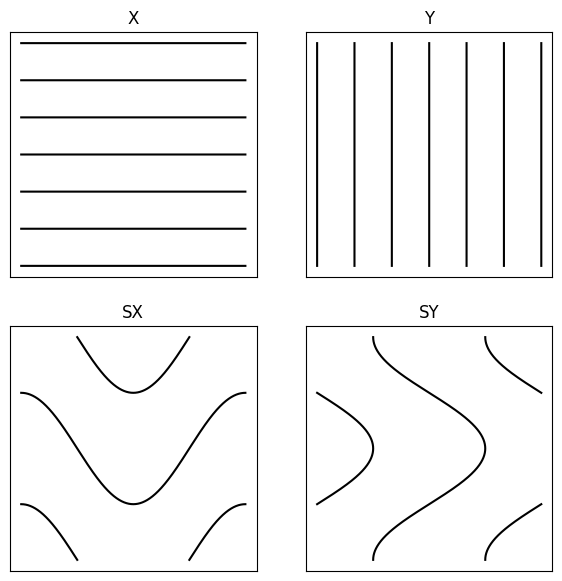

In [4]:
fig = plt.figure(figsize=(7, 7))
for k,layer in enumerate(lines.keys()):
    # if start with trajs plt
    if k >= 4:
        break
    if layer.startswith("trajs"):
        plt.subplot(2,2,k+1)

        for il in lines[layer]:
            plt.plot(il[:,0], il[:,1], 'k-')
        plt.title(layer.replace("trajs_",""))
        # no ticks
        plt.xticks([])
        plt.yticks([])

In [5]:
from validation.TensileExperimental import TensileExperimental


In [6]:
r = TensileExperimental()

df       = r["df"]
df_stats = r["df_stats"]

C:\Users\djoroya\AppData\Local\Temp\ipykernel_15068\4169359739.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j,layer in enumerate(df_stats['layers'][i]):


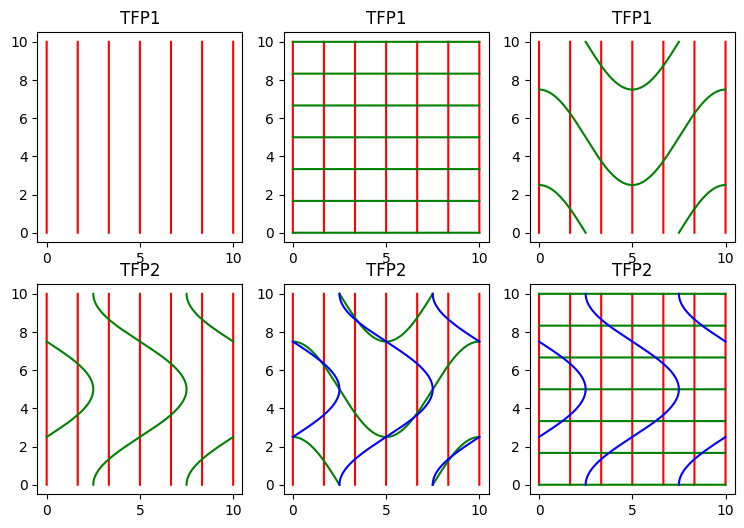

In [7]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
fig = plt.figure(figsize=(9,6))
for i in range(len(df_stats)):
    plt.subplot(2, 3, i+1)

    for j,layer in enumerate(df_stats['layers'][i]):
        for curve in lines["trajs_"+layer]:
            plt.plot(curve[:,0], 
                     curve[:,1],
                     color = colors[j],
                        label = layer) 
    plt.title(df['Name'][i])
    

In [8]:
csv = glob.glob('*/*.json')
csv
names = [ iname.replace(os.sep,'_').replace('.json','').replace('df_opt_','').replace('_thin','')
          for iname in csv]
names

['ALL_TFP_fix', 'ALL_TFP_free', 'NO_TFP1_1_fix', 'NO_TFP1_1_free']

In [9]:
dfs = [loadjson(f) for f in csv ]

In [10]:
dfs[-1]

{'layers':      Evec [GPa]
 0  5.467872e-01
 1  1.846934e-07
 2  1.552993e+01
 3  9.120469e-01
 4  7.939907e-01,
 'errors': {'E': 7.654000000000001, 't': 0.9279999999999999},
 'thickness':      t [mm]
 0  2.714260
 1  0.497545}

In [11]:
dfs[0]["errors"]

{'E': 7.793333333333334, 't': 6.128333333333333}

In [12]:
dfs[0].keys()

dict_keys(['layers', 'errors', 'thickness'])

In [13]:
error_E = [idf["errors"]["E"] for idf in dfs]
error_t = [idf["errors"]["t"] for idf in dfs]

In [14]:
error_E

[7.793333333333334, 7.560000000000001, 7.783333333333332, 7.654000000000001]

In [15]:
Emodulus = [ ids["layers"] for ids in dfs]
Emodulus = pd.concat(Emodulus, axis=1)
Emodulus.columns = names
# names rows X,Y,SX,SY
Emodulus.index = ['X','SX','Y','SY','nucleo']
Emodulus.round(2)


,ALL_TFP_fix,ALL_TFP_free,NO_TFP1_1_fix,NO_TFP1_1_free
X,0.00,0.00,0.00,0.55
SX,0.00,0.00,0.00,0.00
Y,8.76,8.58,10.97,15.53
SY,0.00,0.00,0.00,0.91
nucleo,0.80,0.80,0.08,0.79


In [16]:
Thick = [ ids["thickness"] for ids in dfs]
Thick = pd.concat(Thick, axis=1)
Thick.columns = names
# names rows X,Y,SX,SY
Thick.index = ["Nucleo","Capas"]

Thick.round(2)

,ALL_TFP_fix,ALL_TFP_free,NO_TFP1_1_fix,NO_TFP1_1_free
Nucleo,2.93,2.93,2.93,2.71
Capas,0.48,0.49,0.48,0.50


In [17]:
All = pd.concat([Emodulus, Thick], axis=0)
# index off

All.index = [None]*len(All)
All.round(0)

,ALL_TFP_fix,ALL_TFP_free,NO_TFP1_1_fix,NO_TFP1_1_free
None,0.0,0.0,0.0,1.0
None,0.0,0.0,0.0,0.0
None,9.0,9.0,11.0,16.0
None,0.0,0.0,0.0,1.0
None,1.0,1.0,0.0,1.0
None,3.0,3.0,3.0,3.0
None,0.0,0.0,0.0,0.0


In [18]:
dfs[0]
import numpy as np

def getparams(df):
    return np.concatenate([df['layers']["Evec [GPa]"].values , df['thickness']["t [mm]"].values])




In [19]:
dfs[0]["layers"]["Evec [GPa]"]

0    0.000000e+00
1    0.000000e+00
2    8.760885e+00
3    2.788254e-16
4    7.968293e-01
Name: Evec [GPa], dtype: float64